<a href="https://colab.research.google.com/github/mickeyrahm/Portfolio/blob/master/notebooks/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# --- Load and prepare data ---
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['dteday'] = pd.to_datetime(bikes['dteday'], errors='coerce')
bikes = bikes.dropna(subset=['dteday'])
bikes['total_riders'] = bikes['casual'] + bikes['registered']

# Feature engineering
bikes['hr_sin'] = np.sin(2 * np.pi * bikes['hr'] / 24)
bikes['hr_cos'] = np.cos(2 * np.pi * bikes['hr'] / 24)
bikes['day_of_week'] = bikes['dteday'].dt.dayofweek
bikes['dow_sin'] = np.sin(2 * np.pi * bikes['day_of_week'] / 7)
bikes['dow_cos'] = np.cos(2 * np.pi * bikes['day_of_week'] / 7)
bikes['month'] = bikes['dteday'].dt.month
bikes['month_sin'] = np.sin(2 * np.pi * bikes['month'] / 12)
bikes['month_cos'] = np.cos(2 * np.pi * bikes['month'] / 12)
bikes['temp_x_hum'] = bikes['temp_c'] * bikes['hum']
bikes['feels_x_wind'] = bikes['feels_like_c'] * bikes['windspeed']
bikes['working_hr'] = bikes['workingday'] * bikes['hr']
bikes['is_weekend'] = bikes['day_of_week'].isin([5, 6]).astype(int)
bikes['weekend_or_holiday'] = bikes['is_weekend'] | bikes['holiday']
bikes['time_of_day'] = pd.cut(bikes['hr'], bins=[-1, 6, 12, 18, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'])
bikes = pd.get_dummies(bikes, columns=['season', 'weathersit', 'time_of_day'], drop_first=True)

# Define features and target
X = bikes.drop(columns=['casual', 'registered', 'total_riders', 'dteday'])
y = bikes['total_riders']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Build final model ---
def build_model():
    model = keras.Sequential([
        layers.Dense(256),
        layers.LeakyReLU(negative_slope=0.01),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Dropout(0.3),
        layers.Dense(64),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Dense(1)
    ])
    return model

model = build_model()

# Compile using the optimal learning rate found
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"\nFinal Test MAE: {test_mae:.2f}")


Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 64362.4297 - mae: 161.7187 - val_loss: 28460.6328 - val_mae: 106.1441
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 33866.7852 - mae: 119.9211 - val_loss: 27115.6309 - val_mae: 104.1019
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 31648.8633 - mae: 115.4135 - val_loss: 25717.9980 - val_mae: 102.0463
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 29751.2383 - mae: 111.7112 - val_loss: 25095.6875 - val_mae: 99.8930
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 29355.7832 - mae: 111.1102 - val_loss: 25237.8457 - val_mae: 100.5505
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 29416.8672 - mae: 111.5488 - val_loss: 24777.3789 - val_mae: 99.2439
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 29034.3047 - mae: 110.1228 - val_loss: 24861.6875 - val_mae: 99.5141
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 2


🔁 Training with optimizer: Nadam
Epoch 1/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 51462.6406 - mae: 145.8117 - val_loss: 28324.8477 - val_mae: 107.5745
Epoch 2/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 32060.5312 - mae: 116.6765 - val_loss: 25285.6543 - val_mae: 100.3053
Epoch 3/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 30542.5781 - mae: 113.2740 - val_loss: 26134.5332 - val_mae: 99.7885
Epoch 4/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 29890.2422 - mae: 111.3986 - val_loss: 27615.1816 - val_mae: 105.5456
Epoch 5/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 29350.9609 - mae: 109.6772 - val_loss: 25997.8262 - val_mae: 101.7480
Epoch 6/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 28265.5352 - mae: 107.9198 - val_loss: 25677.1465 - val_mae: 102.5551
Epoch 7/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 29396.4180 - mae: 109.3594 - val_loss: 26018.8359 - val_mae: 104.4332
Epoch 8/20
2250/2250 ━━━━━━━━━━━━━━━

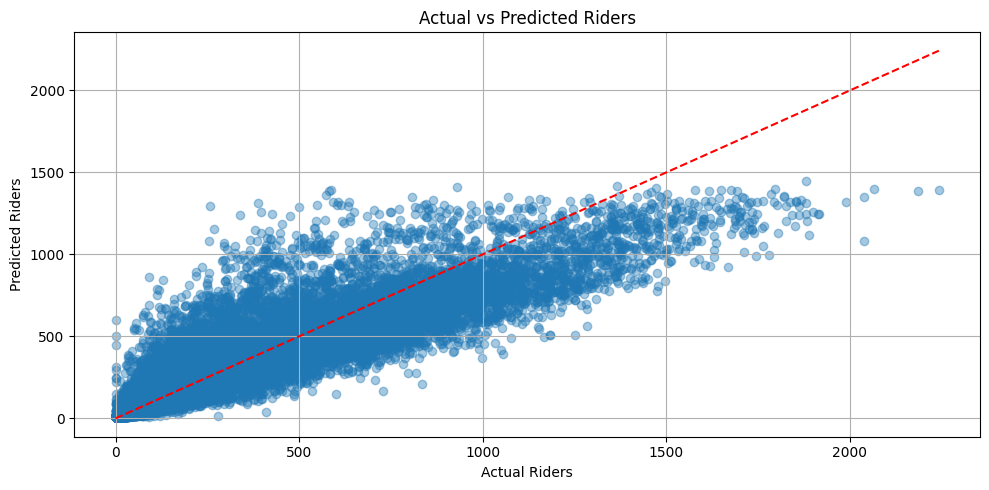

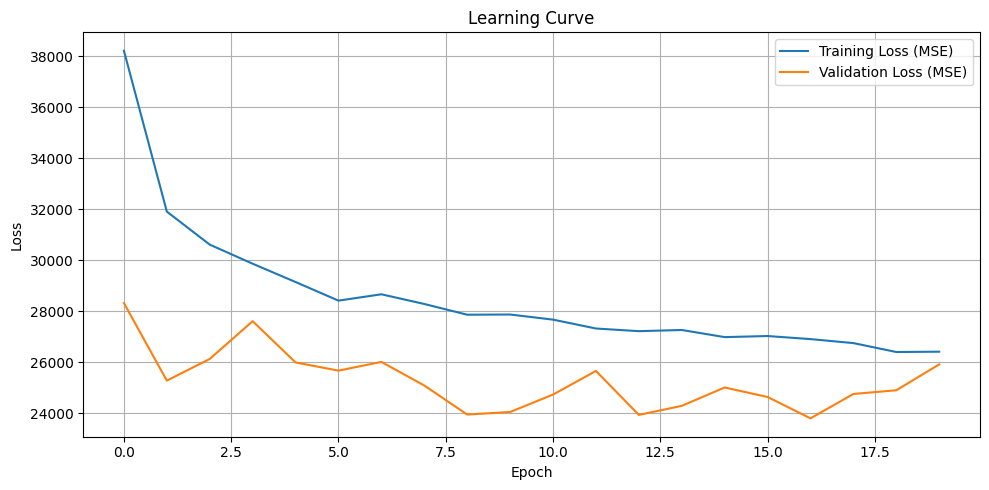

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# --- Load and prepare data ---
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['dteday'] = pd.to_datetime(bikes['dteday'], errors='coerce')
bikes = bikes.dropna(subset=['dteday'])
bikes['total_riders'] = bikes['casual'] + bikes['registered']

# Feature engineering
bikes['hr_sin'] = np.sin(2 * np.pi * bikes['hr'] / 24)
bikes['hr_cos'] = np.cos(2 * np.pi * bikes['hr'] / 24)
bikes['day_of_week'] = bikes['dteday'].dt.dayofweek
bikes['dow_sin'] = np.sin(2 * np.pi * bikes['day_of_week'] / 7)
bikes['dow_cos'] = np.cos(2 * np.pi * bikes['day_of_week'] / 7)
bikes['month'] = bikes['dteday'].dt.month
bikes['month_sin'] = np.sin(2 * np.pi * bikes['month'] / 12)
bikes['month_cos'] = np.cos(2 * np.pi * bikes['month'] / 12)
bikes['temp_x_hum'] = bikes['temp_c'] * bikes['hum']
bikes['feels_x_wind'] = bikes['feels_like_c'] * bikes['windspeed']
bikes['working_hr'] = bikes['workingday'] * bikes['hr']
bikes['is_weekend'] = bikes['day_of_week'].isin([5, 6]).astype(int)
bikes['weekend_or_holiday'] = bikes['is_weekend'] | bikes['holiday']
bikes['time_of_day'] = pd.cut(bikes['hr'], bins=[-1, 6, 12, 18, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# One-hot encode categorical variables
bikes = pd.get_dummies(
    bikes,
    columns=['season', 'weathersit', 'hr', 'day_of_week', 'month', 'time_of_day'],
    drop_first=True
)

# Define features and target
X = bikes.drop(columns=['casual', 'registered', 'total_riders', 'dteday'])
y = bikes['total_riders']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Build deeper model using Adadelta optimizer ---
print(f"\n🔁 Training with optimizer: Nadam")
opt = keras.optimizers.Nadam(learning_rate=.001)

model = keras.Sequential([
    layers.Dense(256),
    layers.LeakyReLU(negative_slope=0.01),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(192),
    layers.LeakyReLU(negative_slope=0.01),
    layers.Dropout(0.3),

    layers.Dense(128),
    layers.LeakyReLU(negative_slope=0.01),
    layers.Dropout(0.3),

    layers.Dense(96),
    layers.LeakyReLU(negative_slope=0.01),
    layers.Dropout(0.2),

    layers.Dense(64),
    layers.LeakyReLU(negative_slope=0.01),

    layers.Dense(1)
])

model.compile(optimizer=opt, loss='mse', metrics=['mae'])
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate and predict ---
y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.2f}")
print(f"MSE  (Mean Squared Error)      : {mse:.2f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.2f}")
print(f"R²   (Coefficient of Determ.)  : {r2:.4f}")

# --- Residual plot ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Riders")
plt.ylabel("Predicted Riders")
plt.title("Actual vs Predicted Riders")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Learning curves ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# --- Load and prepare data ---
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

#Sum up all rentals
bikes['tot_rentals'] = bikes['casual'] + bikes['registered']

bikes['dteday'] = pd.to_datetime(bikes['dteday'], errors='coerce')

# Separate hours into three categories
bikes['hour_cos'] = np.cos(2 * np.pi * bikes['hr'] / 24)
bikes['hour_sin'] = np.sin(2 * np.pi * bikes['hr'] / 24)
bikes['working_hours'] = ((bikes['hr'] >= 8) & (bikes['hr'] <= 17) & (bikes['workingday'] == 1)).astype(int)
bikes['non_working_hours'] = bikes['hr'].map(lambda x: 1 if 18 <= x <= 22 else 0)
bikes['sleep_hours'] = bikes['hr'].map(lambda x: 1 if 23 <= x <= 7 else 0)
bikes['dteday'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y')
bikes['year'] = bikes['dteday'].dt.year
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes['dayofweek'] = bikes['dteday'].dt.dayofweek

##################################
# Neural Network Model
##################################
from sklearn.model_selection import train_test_split


# Prepare data
X = bikes.drop(['tot_rentals', 'casual', 'registered'], axis=1)
# Drop or transform 'dteday'
X = X.drop(['dteday'], axis=1)
y = bikes['tot_rentals']

X_holdout = bikes.drop(['dteday'], axis=1)
# X_holdout.drop(['tot_rentals'], axis=1)
# y_holdout = holdout['tot_rentals']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for NN performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_holdout_scaled = scaler.transform(X_holdout)


# Define model

model = keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

# Compile model
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              metrics=['mae', 'mse'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2, verbose=1)

test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")

predictions = model.predict(X_test_scaled)


predictions_holdout = model.predict(X_holdout_scaled)

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(predictions_holdout, columns = ['predictions'])
my_predictions.to_csv("team3-module4-predictions.csv",index=False)

# Print a few predictions vs actual values
for i in range(100):
    print(f"Predicted: {predictions[i][0]:.0f}, Actual: {y_test.iloc[i]}")


import matplotlib.pyplot as plt


plt.scatter(y_test, predictions)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- casual
- registered
- tot_rentals
